In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

## load the saved results

In [5]:
density_level = "low"

In [6]:
data_path = "/sps/lsst/users/bbiswas/MADNESS_results/" + density_level + "_density"
run_name = "kl1" # 8 to 15 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [7]:
scarlet_plot_color = sns.color_palette("colorblind")[4]
madness_plot_color = sns.color_palette("colorblind")[0]

blended_plot_color = sns.color_palette("colorblind")[1]
isolated_plot_color = sns.color_palette("colorblind")[6]

In [8]:
madness_results=[]
scarlet_results=[]
actual_photometry = []
blended_photometry = []

for file_num in range(300):

    madness_results.append(pd.read_pickle(os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")))
    scarlet_results.append(pd.read_pickle(os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")))

    actual_photometry.append(pd.read_pickle(os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")))
    blended_photometry.append(pd.read_pickle(os.path.join(data_path, "blended_photometry",  str(file_num) + ".pkl")))

madness_results = pd.concat(madness_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [9]:
# mask_contamination=madness_results["r_contamination"].values<5
# madness_results=madness_results[mask_contamination]
# scarlet_results=scarlet_results[mask_contamination]
# actual_photometry=actual_photometry[mask_contamination]
# blended_photometry=blended_photometry[mask_contamination]

In [10]:
madness_results

,u_covariance,u_blendedness,g_covariance,g_blendedness,r_covariance,r_blendedness,i_covariance,i_blendedness,z_covariance,z_blendedness,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.962299,0.003125,0.997953,0.008251,0.999139,0.005315,0.998795,0.002597,0.999506,0.001624,...,299918.432944,5897.541108,0,397283.935236,6839.342124,0,272941.214026,7328.108800,0,0.003977
1,0.994971,0.000974,0.999113,0.001128,0.999163,0.001555,0.999197,0.001417,0.999008,0.001677,...,156138.571829,4449.716643,0,128158.101844,5130.836373,0,65718.947099,5473.933721,0,0.001168
2,0.038529,0.324474,0.575011,0.510091,0.555660,0.647648,0.463243,0.706260,0.403466,0.710131,...,39194.492607,3164.879075,0,27936.032575,3610.914643,0,17094.688640,3840.168793,0,2.301601
3,0.992429,0.005883,0.995834,0.004846,0.995294,0.005673,0.995054,0.007258,0.992654,0.009456,...,21600.731960,3404.234241,0,11553.835054,3898.961282,0,8132.717191,4148.777803,0,0.002705
4,0.993695,0.002710,0.996967,0.002965,0.996516,0.005101,0.996391,0.007085,0.996226,0.005541,...,28076.612661,3817.507866,0,36822.197147,4380.742990,0,16780.225881,4671.423314,0,0.003383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.596934,0.331591,0.991309,0.108863,0.997344,0.038935,0.997406,0.021616,0.997413,0.016770,...,57922.979189,4151.950927,0,53458.283711,4790.691177,0,38372.043388,5204.978784,0,0.027639
236,0.988671,0.301108,0.999558,0.199403,0.999588,0.158688,0.999635,0.095299,0.999566,0.098951,...,196975.257239,3180.137416,0,151443.990086,3636.689578,0,83455.655591,3936.915358,0,0.218943
237,0.994729,0.000519,0.996494,0.000437,0.996084,0.000615,0.995848,0.000990,0.995109,0.001047,...,44765.469420,4829.901861,0,26155.760186,5587.621538,0,23317.678045,6089.312505,0,0.000260
238,0.998032,0.128134,0.999043,0.114912,0.999117,0.132002,0.998991,0.172451,0.998889,0.210953,...,71424.998890,4757.356684,0,40676.348034,5501.054292,0,23768.902789,5996.957390,0,0.200948


# Pixel Covariance

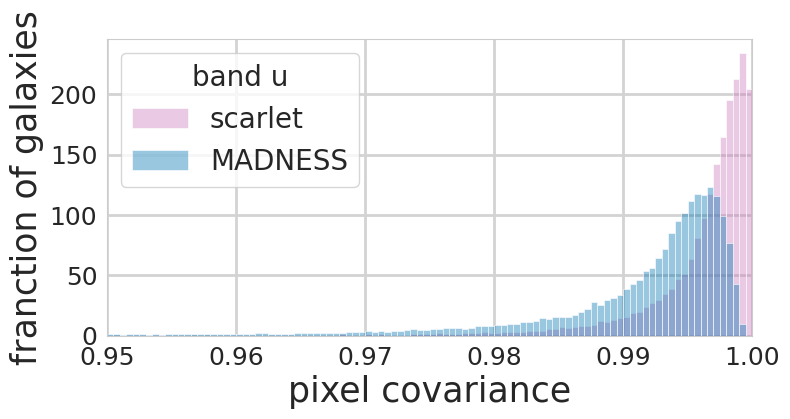

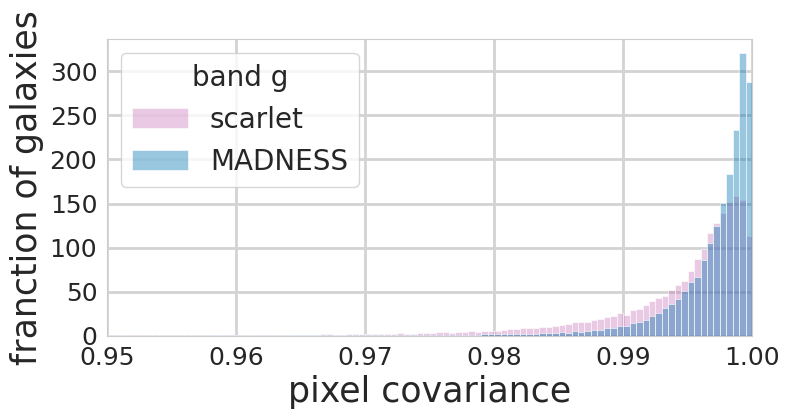

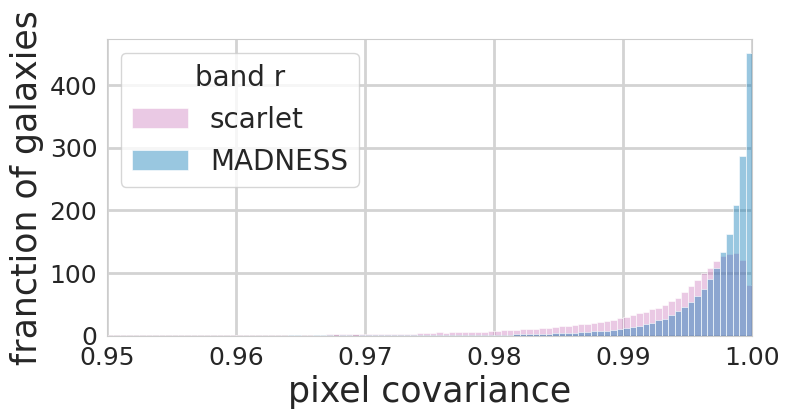

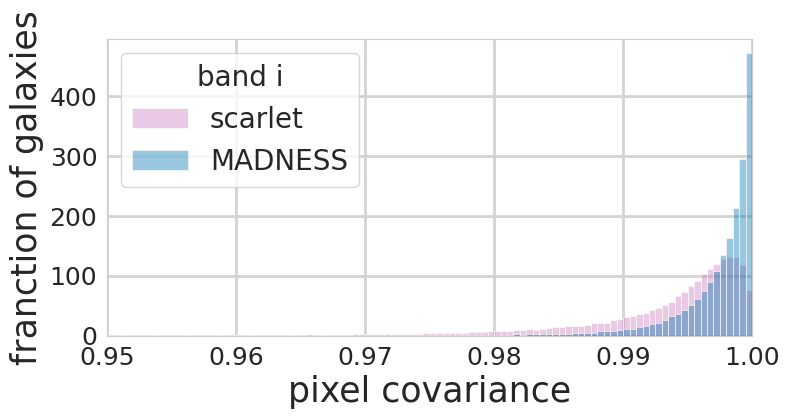

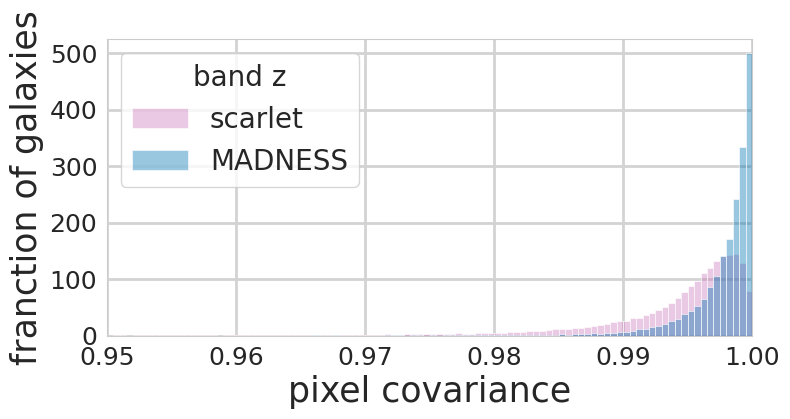

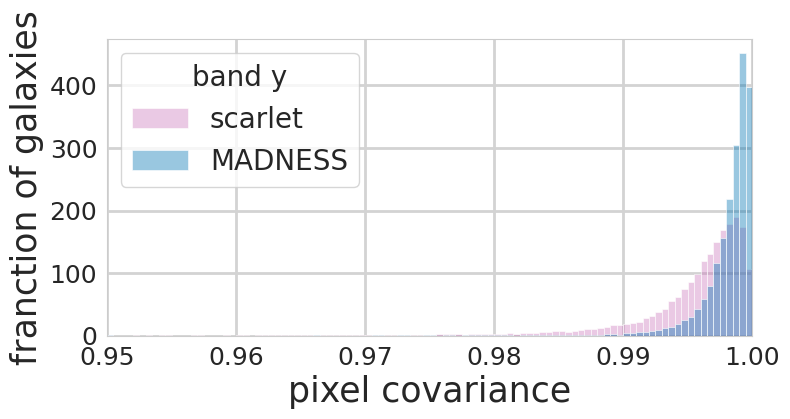

In [11]:
bins = np.arange(0.95, 1, 0.0005)
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    mask = (actual_photometry[band+"_phot_flux"].values/actual_photometry[band+"_phot_fluxerrs"].values)>5
    sns.histplot(scarlet_results[mask][band + '_covariance'].values, bins=bins, alpha=0.4, label="scarlet", color=scarlet_plot_color, stat='density')
    sns.histplot(madness_results[mask][band + '_covariance'].values, bins=bins, alpha=0.4, label="MADNESS", color=madness_plot_color, stat='density')
    plt.legend()
    plt.xlim([0.95, 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("pixel covariance", fontsize=25)
    plt.ylabel("franction of galaxies", fontsize=25)
    plt.legend(fontsize=20, title="band " + band, loc="upper left", title_fontsize=20)
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.savefig(result_dir_path + "/cov_res_"+band)
    plt.show()

# Relative error in apperture photometry (elliptical apertures)

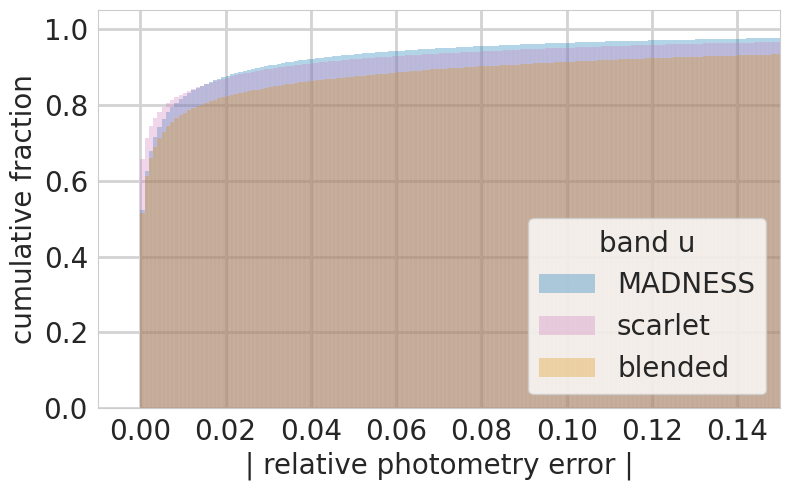

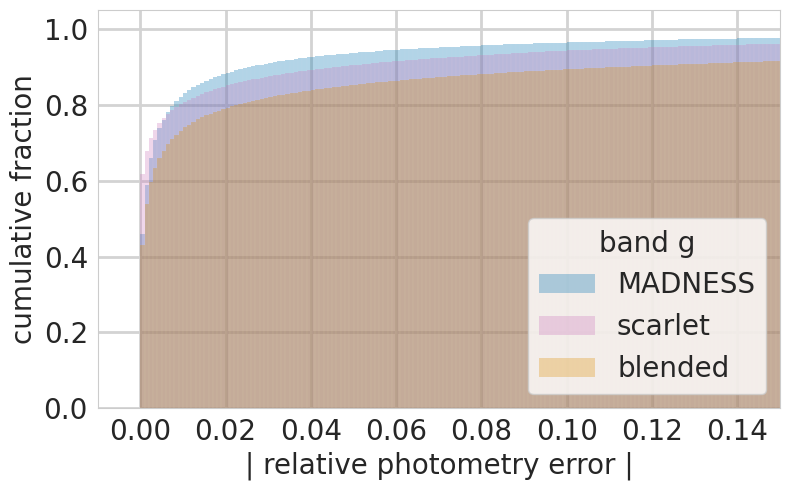

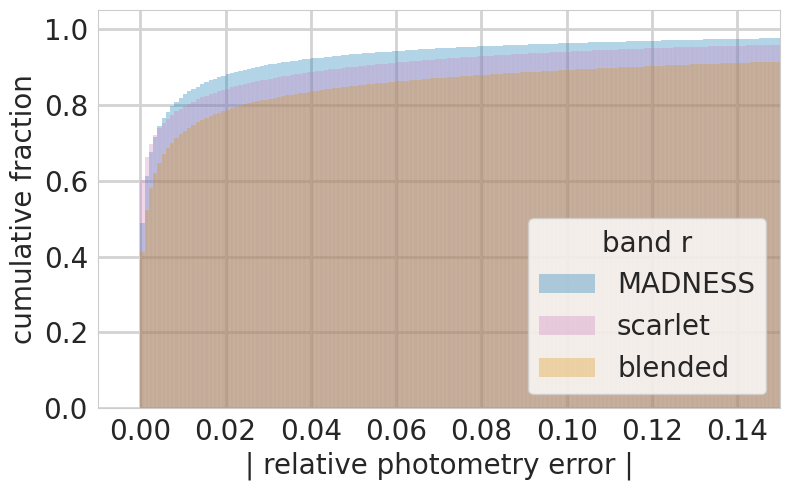

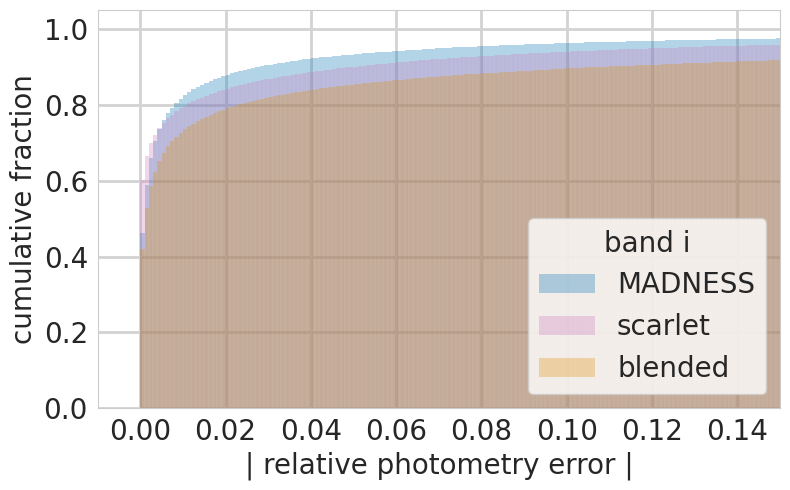

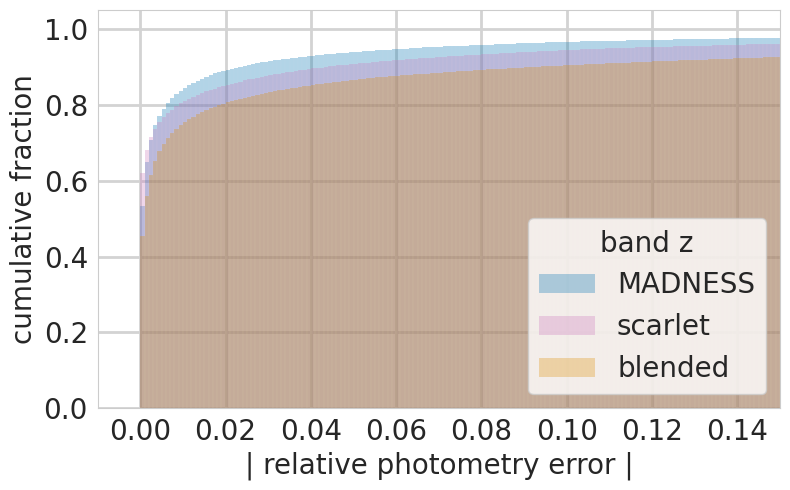

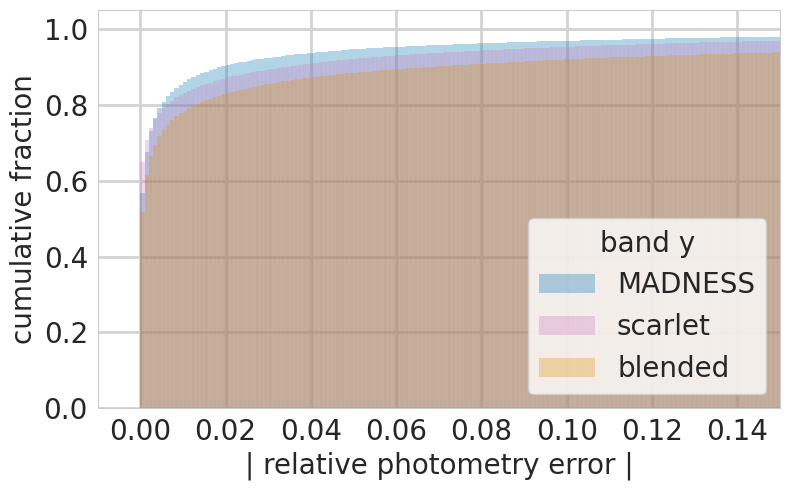

In [12]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:

    #sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style("whitegrid")
#     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
# })
    plt.figure(figsize=(8, 5))
    bins = np.arange(-1, 1, 0.001)
    mask = (actual_photometry[band+"_phot_flux"].values/actual_photometry[band+"_phot_fluxerrs"].values)>5
    sns.histplot(
        np.abs((madness_results[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="MADNESS",
        cumulative=True,
        color=madness_plot_color,
    )

    sns.histplot(
        np.abs((scarlet_results[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="scarlet",
        cumulative=True,
        color=scarlet_plot_color,
    )

    sns.histplot(
        np.abs((blended_photometry[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="blended",
        cumulative=True,
        color=blended_plot_color,
    )
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([-.01, .15])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("| relative photometry error |", fontsize=20)
    plt.ylabel("cumulative fraction", fontsize=20)
    plt.legend(fontsize=20, title="band " + band, loc="lower right", title_fontsize=20)
    plt.tight_layout()
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band)
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band + ".pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Box plots

SNR definition here is one used to place the SNR>10 cut on the catalog.

In [13]:
boxplot_snr_df = {}

r_snr_mask = (actual_photometry["r_phot_flux"].values/actual_photometry["r_phot_fluxerrs"].values)>5

# madness_actual_flux = madness_results[band+"_actual_flux"].value
# madness_predicted_flux = madness_results[band+"_predicted_flux"].value

# scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
# scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

# scarlet_relative_difference = np.divide(
#     scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
# )
# madness_relative_difference = np.divide(
#     madness_predicted_flux - madness_actual_flux, madness_actual_flux
# )
boxplot_snr_df["snr"] = list(madness_results['r_band_snr'][r_snr_mask])
boxplot_snr_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
#boxplot_snr_df["r_relative_flux_err"] = list(madness_relative_difference)
boxplot_snr_df["r_relative_flux_err"] = list(np.abs(madness_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])


boxplot_snr_df["snr"].extend(list(scarlet_results['r_band_snr'][r_snr_mask]))
boxplot_snr_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_snr_df["r_relative_flux_err"].extend(list(np.abs(scarlet_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])) 

boxplot_snr_df = pd.DataFrame(boxplot_snr_df)

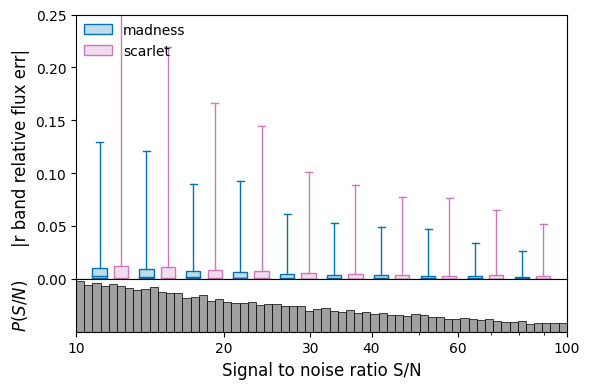

In [14]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    boxplot_snr_df, 
    x = 'snr', y = "r_relative_flux_err", z = "type",
    xlim = (10, 100),
    ylim = (0, 0.25), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = '|r band relative flux err|',
    y_label_hist='$P(S/N)$',
    legend_remove = False,
    x_ticks=[10, 20, 30, 40,  60, 100],
    whis = [5,95],
    percents = [25,75],
    palette = [madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.png"))

In [15]:
madness_results

,u_covariance,u_blendedness,g_covariance,g_blendedness,r_covariance,r_blendedness,i_covariance,i_blendedness,z_covariance,z_blendedness,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.962299,0.003125,0.997953,0.008251,0.999139,0.005315,0.998795,0.002597,0.999506,0.001624,...,299918.432944,5897.541108,0,397283.935236,6839.342124,0,272941.214026,7328.108800,0,0.003977
1,0.994971,0.000974,0.999113,0.001128,0.999163,0.001555,0.999197,0.001417,0.999008,0.001677,...,156138.571829,4449.716643,0,128158.101844,5130.836373,0,65718.947099,5473.933721,0,0.001168
2,0.038529,0.324474,0.575011,0.510091,0.555660,0.647648,0.463243,0.706260,0.403466,0.710131,...,39194.492607,3164.879075,0,27936.032575,3610.914643,0,17094.688640,3840.168793,0,2.301601
3,0.992429,0.005883,0.995834,0.004846,0.995294,0.005673,0.995054,0.007258,0.992654,0.009456,...,21600.731960,3404.234241,0,11553.835054,3898.961282,0,8132.717191,4148.777803,0,0.002705
4,0.993695,0.002710,0.996967,0.002965,0.996516,0.005101,0.996391,0.007085,0.996226,0.005541,...,28076.612661,3817.507866,0,36822.197147,4380.742990,0,16780.225881,4671.423314,0,0.003383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.596934,0.331591,0.991309,0.108863,0.997344,0.038935,0.997406,0.021616,0.997413,0.016770,...,57922.979189,4151.950927,0,53458.283711,4790.691177,0,38372.043388,5204.978784,0,0.027639
236,0.988671,0.301108,0.999558,0.199403,0.999588,0.158688,0.999635,0.095299,0.999566,0.098951,...,196975.257239,3180.137416,0,151443.990086,3636.689578,0,83455.655591,3936.915358,0,0.218943
237,0.994729,0.000519,0.996494,0.000437,0.996084,0.000615,0.995848,0.000990,0.995109,0.001047,...,44765.469420,4829.901861,0,26155.760186,5587.621538,0,23317.678045,6089.312505,0,0.000260
238,0.998032,0.128134,0.999043,0.114912,0.999117,0.132002,0.998991,0.172451,0.998889,0.210953,...,71424.998890,4757.356684,0,40676.348034,5501.054292,0,23768.902789,5996.957390,0,0.200948


In [16]:
np.sum(mask)

38108

In [17]:
boxplot_blendedness_df = {}

boxplot_blendedness_df['r_blendedness'] = list(madness_results['r_blendedness'][r_snr_mask])
boxplot_blendedness_df['r_contamination'] = list(madness_results['r_contamination'][r_snr_mask])
boxplot_blendedness_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
boxplot_blendedness_df["r_relative_flux_err"] = list(np.abs(madness_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])


boxplot_blendedness_df['r_blendedness'].extend(list(scarlet_results['r_blendedness'][r_snr_mask]))
boxplot_blendedness_df['r_contamination'].extend(list(madness_results['r_contamination'][r_snr_mask]))
boxplot_blendedness_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_blendedness_df["r_relative_flux_err"].extend(list(np.abs(scarlet_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])) 

boxplot_blendedness_df = pd.DataFrame(boxplot_blendedness_df)

In [18]:
np.amin(boxplot_blendedness_df['r_blendedness'])

2.9470337992165696e-07

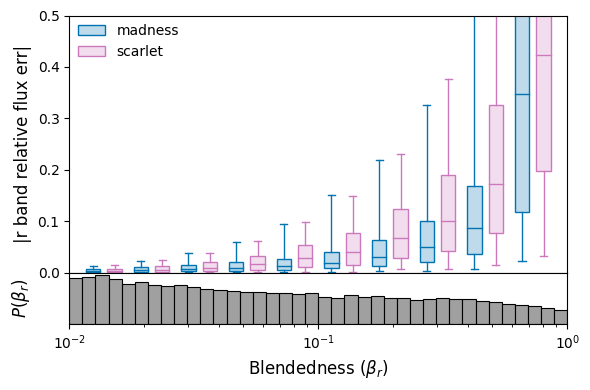

In [19]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_blendedness', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 1),
    ylim = (-0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label=r'Blendedness $(\beta_r)$', 
    y_label = '|r band relative flux err|',
    y_label_hist=r'$P(\beta_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=[madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_box_plot.png"))

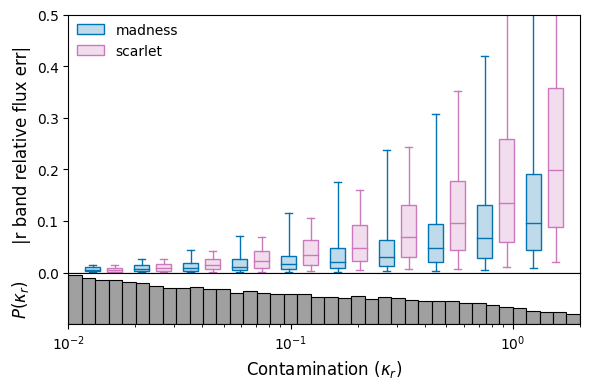

In [20]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_contamination', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 2),
    ylim = (0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Contamination $(\kappa_r)$', 
    y_label = '|r band relative flux err|',
    y_label_hist='$P(\kappa_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=[madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_box_plot.png"))

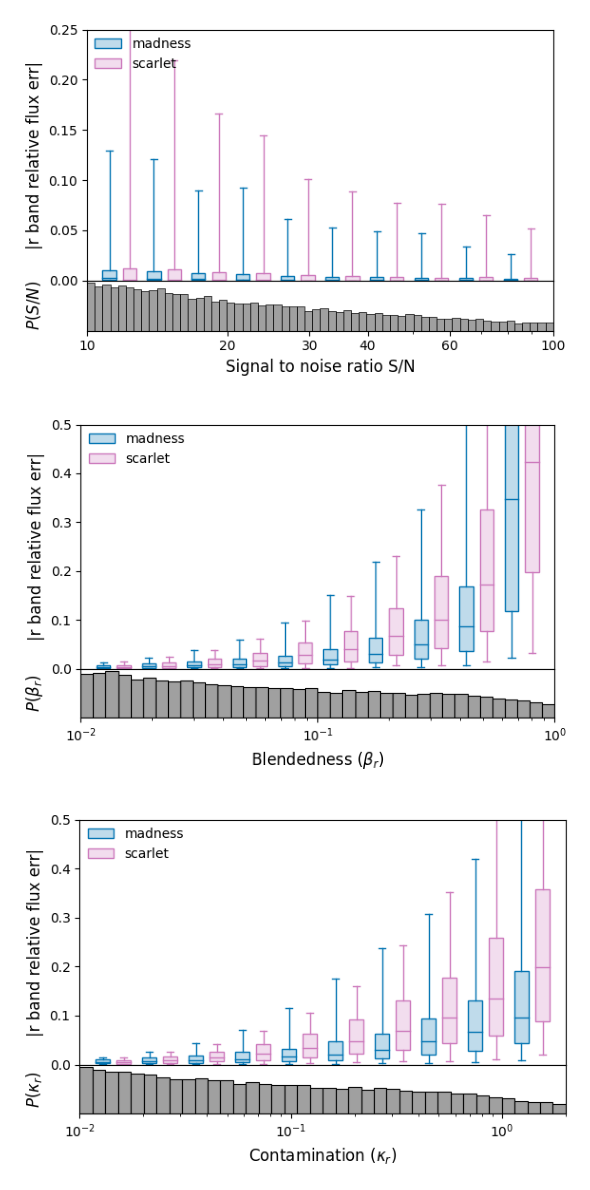

In [21]:
import matplotlib.image as mpimg

f, axarr = plt.subplots(3, 1, figsize=(8, 12))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/boxplot_results.png")

plt.show()